In [26]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import os
from google.colab import files

In [2]:
#import dataset from the file upload
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving Employee.csv to Employee.csv


In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.describe()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
#check missing values
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


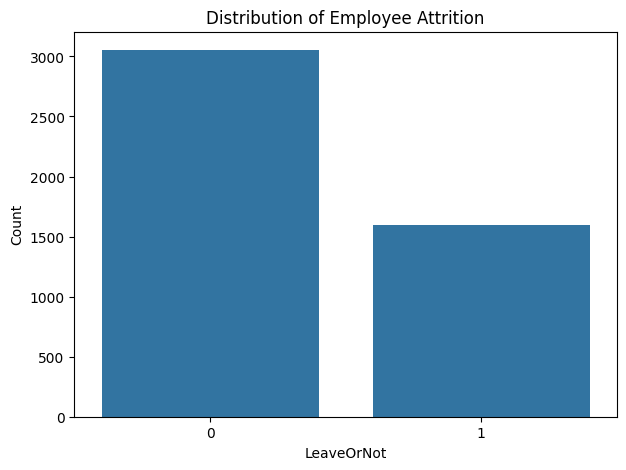

LeaveOrNot
0    0.656136
1    0.343864
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='LeaveOrNot',data=df)
plt.title('Distribution of Employee Attrition')
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.show()

print(df['LeaveOrNot'].value_counts(normalize=True))


In [8]:
#split data into target and features
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']


In [9]:
#get the categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

#print
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')
Numerical features: Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')


In [10]:
#split data into train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (3722, 8)
X_test shape: (931, 8)


In [11]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#preprocess data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
print("Preprocessing successfully")

Preprocessing successfully


              precision    recall  f1-score   support

           0       0.76      0.91      0.83       611
           1       0.72      0.47      0.57       320

    accuracy                           0.76       931
   macro avg       0.74      0.69      0.70       931
weighted avg       0.75      0.76      0.74       931



Text(50.722222222222214, 0.5, 'Actual')

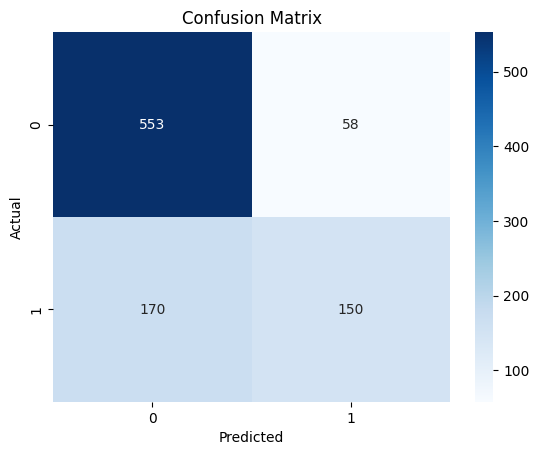

In [13]:
#use logistic regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

#train the model
lr_pipeline.fit(X_train, y_train)

#predict on test data
y_pred_lr = lr_pipeline.predict(X_test)

#evaluate model
print(classification_report(y_test, y_pred_lr))

#display confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       611
           1       0.75      0.62      0.68       320

    accuracy                           0.80       931
   macro avg       0.79      0.76      0.77       931
weighted avg       0.80      0.80      0.80       931



Text(50.722222222222214, 0.5, 'Actual')

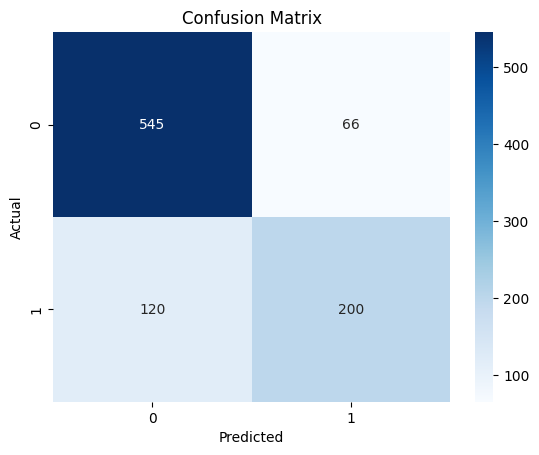

In [14]:
#use decision tree pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_dt))

#confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       611
           1       0.82      0.66      0.73       320

    accuracy                           0.84       931
   macro avg       0.83      0.79      0.81       931
weighted avg       0.83      0.84      0.83       931



Text(50.722222222222214, 0.5, 'Actual')

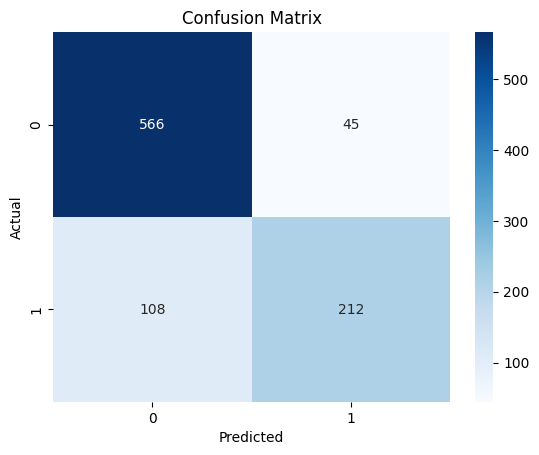

In [20]:
#random forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,n_estimators=110))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_rf))

#display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test,y_pred_rf)],
    'F1-score (class 1)':[
        f1_score(y_test, y_pred_lr,pos_label=1),
        f1_score(y_test, y_pred_dt,pos_label=1),
        f1_score(y_test,y_pred_rf,pos_label=1)]
    })

performance_df = pd.DataFrame(model_performance).sort_values(by='F1-score (class 1)',ascending=False)
performance_df


,Model,Accuracy,F1-score (class 1)
2,Random Forest,0.835661,0.734835
1,Decision Tree,0.800215,0.682594
0,Logistic Regression,0.755102,0.568182


In [22]:
#save the best model
best_model_pipeline = rf_pipeline
filename = 'best_model_employee_attition.joblib'
joblib.dump(best_model_pipeline, filename)


['best_model_employee_attition.joblib']

In [27]:
#inference function to make single prediction
model_filename = 'best_model_employee_attition.joblib'
if not os.path.exists(model_filename):
    print(f"Model file '{model_filename}' not found.")
else:
  loaded_model = joblib.load(model_filename)
  print(f"Model '{model_filename}' loaded successfully.")

new_employee_data = {
     "Education": "Masters",
     "JoiningYear": 2017,
     "City": "New Delhi",
     "PaymentTier": 2,
     "Age": 27,
     "Gender": "Female",
     "EverBenched": "No",
     "ExperienceInCurrentDomain": 5
     }
new_employee_df = pd.DataFrame([new_employee_data])
print(new_employee_df)

def predict_employee_leave(data, model):
  prediction = model.predict(data)
  probabilities = model.predict_proba(data)
  return prediction[0], probabilities[0]

prediction, probabilities = predict_employee_leave(new_employee_df, loaded_model)

#Interpret and display the results
leave_probability = probabilities[1]*100
if prediction ==1:
  print(f"Outcome: The model predicts that the employee will leave.")
else:
  print(f"Outcome: The model predicts that the employee will stay.")

print(f"Confidence(Probability of leaving): {leave_probability:.2f}%")

Model 'best_model_employee_attition.joblib' loaded successfully.
  Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0   Masters         2017  New Delhi            2   27  Female          No   

   ExperienceInCurrentDomain  
0                          5  
Outcome: The model predicts that the employee will stay.
Confidence(Probability of leaving): 35.24%


In [25]:
#print X test and Y test first 5 raw
print(X_test.head())
print(y_test.head())

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
832     Masters         2017  New Delhi            2   27  Female          No   
3223  Bachelors         2014  Bangalore            3   36  Female          No   
4344  Bachelors         2012  Bangalore            3   31    Male          No   
3746  Bachelors         2015  New Delhi            3   31    Male          No   
1019  Bachelors         2013  Bangalore            3   27  Female          No   

      ExperienceInCurrentDomain  
832                           5  
3223                          3  
4344                          3  
3746                          0  
1019                          5  
832     1
3223    0
4344    0
3746    0
1019    0
Name: LeaveOrNot, dtype: int64
